<font size= 10> **Prospect Theory SWB Model Parameter Recovery**


Goal of SWB prospect theory models is to capture individual subject's risk aversion, loss aversion, and choice probability to generate utility-based expected values of each trial for each subject. If recoverable, these models will be used to estimate subjective wellbeing ratings. Here, models are recovered independent from ratings. 

## SWB Decision Models:
1. Base PT Model
    - free params: loss aversion, risk aversion, temp
2. Dual Risk Aversion PT Model:
    - free params: loss aversion, gain risk aversion, loss risk aversion, temp


## Parameter recovery for 4th Yr Committee Meeting

#### To-dos:
- Fixed inverse temp (=5) parameter recovery 
- Full inverse temp estimation (0-20) 
- High inverse temp estimation (5-20)
- Implement MAP EM to improve estimation
- Figs for presentations
- Parallelization
- Parameter initialization improvements

In [1]:
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import minimize # minimize function is used for parameter recovery 
import seaborn as sns 
import tqdm
from scipy.stats import pearsonr
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [71]:
import sys
sys.path.append('/sc/arion/projects/guLab/Alie/SWB/swb_behav_models/scripts/')
import SWB_modeling_utils

Getting beta distribution values for parameter initialization:

In [ ]:
#https://en.wikipedia.org/wiki/Beta_distribution
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.beta.html

In [4]:
test = pd.read_excel('/sc/arion/projects/guLab/Alie/SWB/swb_behav_models/data/pt_recovery/DATA_for_JASP_Anxiety.xlsx')

In [5]:
test

,ID,Mu,Lambda,Rho,Log Mu,Log Loss Aversion (=Log Lambda),Log Risk Aversion (= -Log Rho),Mu MAP,Lambda MAP,Rho MAP,...,Memory RT gamble gain-only,Memory RT safe gain-only,Memory RT mixed happy,Memory RT mixed fearful,Memory RT mixed neutral,Memory RT mixed object,Memory RT gain-only happy,Memory RT gain-only fearful,Memory RT gain-only neutral,Memory RT gain-only object
0,101,5.903777,1.518513,0.455543,1.775592,0.417732,0.786265,5.787447,1.526465,0.460361,...,0.719400,0.768711,0.836489,0.790917,0.785042,0.851136,0.796261,0.736545,0.762227,0.787696
1,103,0.711030,2.135983,0.999249,-0.341041,0.758927,0.000751,0.758615,2.100183,0.978204,...,0.697879,0.548522,0.534224,0.566633,0.622857,0.649429,0.571640,0.564960,0.637080,0.617560
2,104,7.906302,2.090543,0.360130,2.067660,0.737424,1.021290,7.715798,2.095375,0.360503,...,0.904083,0.854304,0.843042,0.812347,0.751449,0.850750,0.793083,0.865833,0.884792,0.933143
3,105,3.700953,3.375923,0.384483,1.308590,1.216669,0.955855,4.215022,2.974884,0.328743,...,0.694667,0.670223,0.719082,0.701396,0.624735,0.638531,0.692920,0.690200,0.627880,0.675760
4,106,5.314835,1.612572,0.345016,1.670502,0.477830,1.064166,5.266382,1.617154,0.345814,...,0.745167,0.789449,0.817796,0.816000,0.842469,0.821146,0.775040,0.810167,0.757200,0.763080
5,107,7.811966,1.294114,0.372040,2.055657,0.257827,0.988754,7.666140,1.295810,0.373189,...,0.754773,0.745403,0.698061,0.702939,0.695396,0.746667,0.680640,0.707875,0.710680,0.889160
6,108,6.005726,2.315533,0.355252,1.792713,0.839640,1.034927,5.978647,2.312659,0.354989,...,0.712111,0.711758,0.699354,0.742857,0.730857,0.767574,0.704280,0.698560,0.608960,0.835360
7,110,3.365204,2.590872,0.480158,1.213489,0.951994,0.733640,3.463795,2.546262,0.473257,...,0.927750,0.958165,0.969255,1.004122,0.951043,0.900653,0.957208,0.914500,0.944920,1.001375
8,111,8.345419,1.523710,0.299816,2.121713,0.421148,1.204587,8.127667,1.528758,0.300566,...,0.866417,0.836651,0.761857,0.770735,0.810604,0.875021,0.832440,0.870960,0.813000,0.843409
9,113,0.211724,2.301063,1.641033,-1.552471,0.833371,-0.495326,0.284812,2.194417,1.525382,...,0.680882,0.662735,0.687306,0.633735,0.684510,0.708367,0.652560,0.681520,0.653200,0.700680


In [8]:
np.mean(test.Mu)

4.51508976524965

(array([18.,  8.,  9.,  5.,  3.,  2.,  1.,  0.,  1.,  1.]),
 array([ 0.0477658 ,  2.03852688,  4.02928796,  6.02004904,  8.01081012,
        10.0015712 , 11.99233229, 13.98309337, 15.97385445, 17.96461553,
        19.95537661]),
 <BarContainer object of 10 artists>)

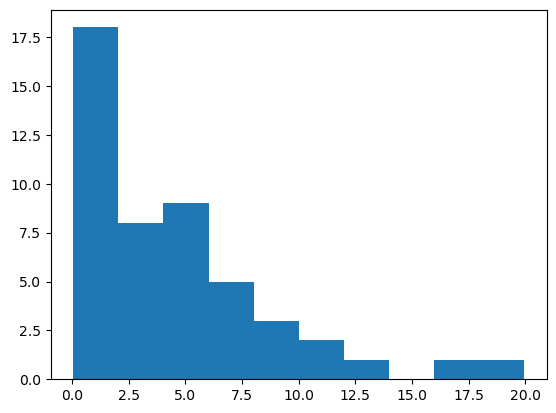

In [5]:
plt.hist(test.Mu) #looks like a=1 b=8 beta dist

In [9]:
N = 100 # sample size
a = 1  # shape parameter a
b = 8  # shape parameter b
lower_bound = 0  #### DON'T MAKE LOWER BOUND ZERO!

upper_bound = 20
inv_temps = (upper_bound - lower_bound) * np.random.beta(a, b, N) + lower_bound



(array([33., 21., 17., 13.,  6.,  4.,  4.,  0.,  1.,  1.]),
 array([ 0.03265538,  1.06037908,  2.08810278,  3.11582648,  4.14355018,
         5.17127388,  6.19899758,  7.22672127,  8.25444497,  9.28216867,
        10.30989237]),
 <BarContainer object of 10 artists>)

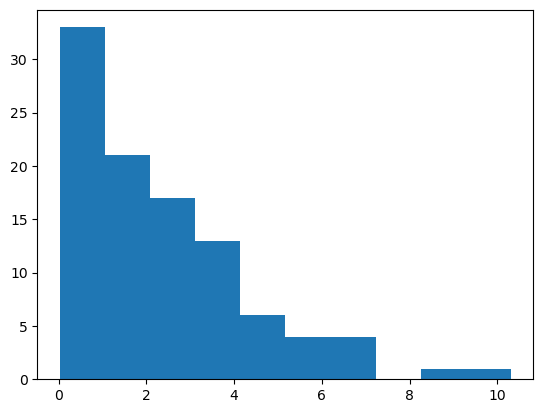

In [10]:
plt.hist(inv_temps) #validating hypothesized beta distribution 

(array([ 3.,  6., 12.,  9.,  8.,  7.,  0.,  2.,  0.,  1.]),
 array([0.89323327, 1.21436727, 1.53550127, 1.85663527, 2.17776926,
        2.49890326, 2.82003726, 3.14117125, 3.46230525, 3.78343925,
        4.10457324]),
 <BarContainer object of 10 artists>)

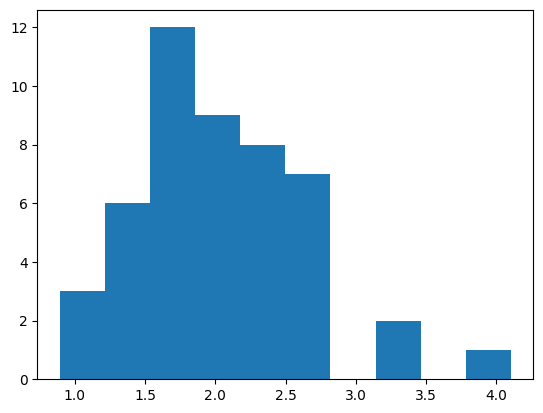

In [21]:
plt.hist(test.Lambda) #looks closer to normal a=2 b =4? 

In [42]:
N = 100 # sample size
a = 2  # shape parameter a
b = 4  # shape parameter b
lower_bound = 0
upper_bound = 5
lams = (upper_bound - lower_bound) * np.random.beta(a, b, N) + lower_bound


(array([11.,  9., 17., 17., 13.,  9., 11.,  8.,  2.,  3.]),
 array([0.26755437, 0.64481628, 1.0220782 , 1.39934012, 1.77660203,
        2.15386395, 2.53112587, 2.90838778, 3.2856497 , 3.66291162,
        4.04017353]),
 <BarContainer object of 10 artists>)

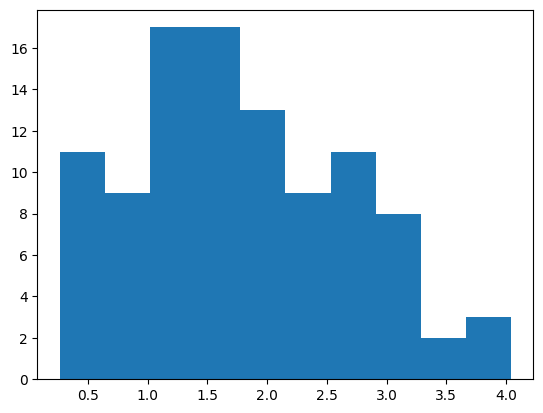

In [43]:
plt.hist(lams)

(array([23.,  6.,  6.,  8.,  1.,  1.,  1.,  0.,  1.,  1.]),
 array([0.28856835, 0.49359893, 0.6986295 , 0.90366008, 1.10869066,
        1.31372124, 1.51875182, 1.72378239, 1.92881297, 2.13384355,
        2.33887413]),
 <BarContainer object of 10 artists>)

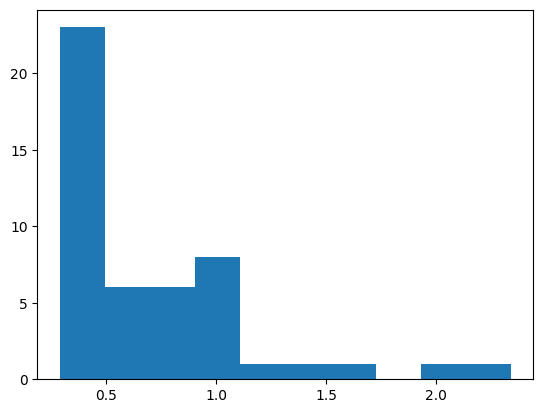

In [22]:
plt.hist(test.Rho) #looks like 1 9 beta distribution

In [30]:
N = 100 # sample size
a = 1  # shape parameter a
b = 9  # shape parameter b
lower_bound = 0
upper_bound = 3
rhos = (upper_bound - lower_bound) * np.random.beta(a, b, N) + lower_bound


(array([39., 20., 14.,  7.,  9.,  2.,  6.,  2.,  0.,  1.]),
 array([0.00608346, 0.1458943 , 0.28570514, 0.42551598, 0.56532682,
        0.70513766, 0.8449485 , 0.98475934, 1.12457018, 1.26438102,
        1.40419186]),
 <BarContainer object of 10 artists>)

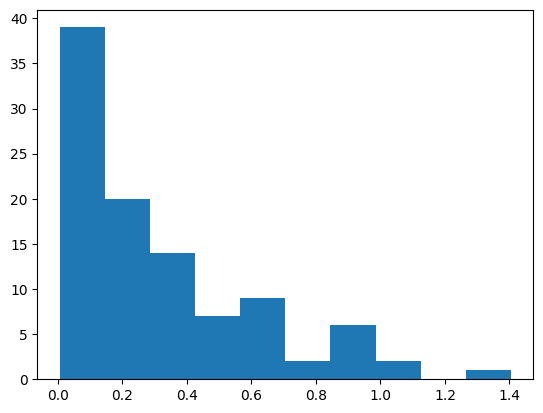

In [31]:
plt.hist(rhos)

In [14]:
test

,ID,Mu,Lambda,Rho,Log Mu,Log Loss Aversion (=Log Lambda),Log Risk Aversion (= -Log Rho),Mu MAP,Lambda MAP,Rho MAP,...,Memory RT gamble gain-only,Memory RT safe gain-only,Memory RT mixed happy,Memory RT mixed fearful,Memory RT mixed neutral,Memory RT mixed object,Memory RT gain-only happy,Memory RT gain-only fearful,Memory RT gain-only neutral,Memory RT gain-only object
0,101,5.903777,1.518513,0.455543,1.775592,0.417732,0.786265,5.787447,1.526465,0.460361,...,0.719400,0.768711,0.836489,0.790917,0.785042,0.851136,0.796261,0.736545,0.762227,0.787696
1,103,0.711030,2.135983,0.999249,-0.341041,0.758927,0.000751,0.758615,2.100183,0.978204,...,0.697879,0.548522,0.534224,0.566633,0.622857,0.649429,0.571640,0.564960,0.637080,0.617560
2,104,7.906302,2.090543,0.360130,2.067660,0.737424,1.021290,7.715798,2.095375,0.360503,...,0.904083,0.854304,0.843042,0.812347,0.751449,0.850750,0.793083,0.865833,0.884792,0.933143
3,105,3.700953,3.375923,0.384483,1.308590,1.216669,0.955855,4.215022,2.974884,0.328743,...,0.694667,0.670223,0.719082,0.701396,0.624735,0.638531,0.692920,0.690200,0.627880,0.675760
4,106,5.314835,1.612572,0.345016,1.670502,0.477830,1.064166,5.266382,1.617154,0.345814,...,0.745167,0.789449,0.817796,0.816000,0.842469,0.821146,0.775040,0.810167,0.757200,0.763080
5,107,7.811966,1.294114,0.372040,2.055657,0.257827,0.988754,7.666140,1.295810,0.373189,...,0.754773,0.745403,0.698061,0.702939,0.695396,0.746667,0.680640,0.707875,0.710680,0.889160
6,108,6.005726,2.315533,0.355252,1.792713,0.839640,1.034927,5.978647,2.312659,0.354989,...,0.712111,0.711758,0.699354,0.742857,0.730857,0.767574,0.704280,0.698560,0.608960,0.835360
7,110,3.365204,2.590872,0.480158,1.213489,0.951994,0.733640,3.463795,2.546262,0.473257,...,0.927750,0.958165,0.969255,1.004122,0.951043,0.900653,0.957208,0.914500,0.944920,1.001375
8,111,8.345419,1.523710,0.299816,2.121713,0.421148,1.204587,8.127667,1.528758,0.300566,...,0.866417,0.836651,0.761857,0.770735,0.810604,0.875021,0.832440,0.870960,0.813000,0.843409
9,113,0.211724,2.301063,1.641033,-1.552471,0.833371,-0.495326,0.284812,2.194417,1.525382,...,0.680882,0.662735,0.687306,0.633735,0.684510,0.708367,0.652560,0.681520,0.653200,0.700680


<font size= 8> **Simulation**

### Simulation Evaluation (for each model): 

1. Input known parameters into the model and use the model to simulate data
2. For decision-only models, gamble decision behavior will be simulated. For happiness models, mood ratings will also be simulated based on simulated gamble behavior + outcomes generated by the model. 

## Simulation for Model 1: Base PT Model
- free params (3): risk aversion, loss aversion, temp


Simulating 100 repetitions of a slightly risk seeking, loss averse patient

In [64]:
#free parameters (3): risk aversion, loss aversion, inverse temperature

number_of_trials = 150
number_of_reps = 100

risk_sim_init = SWB_modeling_utils.param_init(n_values=1, n_iter=1, upper_bound=3, lower_bound=0.1, method='beta', beta_shape=[1,9])
loss_sim_init = SWB_modeling_utils.param_init(n_values=1, n_iter=1, upper_bound=5, lower_bound=0.1, method='beta', beta_shape=[2,9])
temp_sim_init = SWB_modeling_utils.param_init(n_values=1, n_iter=1, upper_bound=20, lower_bound=0, method='beta', beta_shape=[1,8])


print('Risk:',risk_sim_init,'Loss:',loss_sim_init,'Inv Temp:',temp_sim_init)

Risk: [0.20594036] Loss: [1.51987833] Inv Temp: [1.47044689]


In [72]:

base_pt_sim_df = SWB_modeling_utils.simulate_base_pt((risk_sim_init,loss_sim_init,temp_sim_init),number_of_reps,number_of_trials)
  

In [73]:
base_pt_sim_df

,rep,tr,TrialType,ChoicePred,ChoiceProb,util_gamble,util_safe,p_gamble,p_safe,SafeBet,HighBet,LowBet
0,0,0,mix,gamble,[0.443294392210783],[-0.154920574745381],[0.0],[0.443294392210783],[0.5567056077892171],0.00,0.80,-0.41
1,0,1,mix,safe,[0.564810921699248],[-0.17730012978119353],[0.0],[0.4351890783007521],[0.564810921699248],0.00,0.57,-0.38
2,0,2,loss,safe,[0.31601241481524955],[-0.6768674158167548],[-1.2019855100943044],[0.6839875851847504],[0.31601241481524955],-0.32,0.00,-0.57
3,0,3,gain,gamble,[0.4137505877217402],[0.6190054420859731],[0.8559959605533419],[0.4137505877217402],[0.5862494122782598],0.47,2.82,0.00
4,0,4,gain,safe,[0.5987073547363608],[0.6120767549910054],[0.884158648004186],[0.4012926452636392],[0.5987073547363608],0.55,2.67,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,99,145,loss,gamble,[0.6137527155445932],[-0.9021384388511527],[-1.2170864387514977],[0.6137527155445932],[0.3862472844554068],-0.34,0.00,-2.30
14996,99,146,mix,safe,[0.5402085534875364],[-0.10961447644010958],[0.0],[0.4597914465124637],[0.5402085534875364],0.00,2.04,-0.62
14997,99,147,loss,gamble,[0.6028908295897901],[-0.8071510858604525],[-1.0910953121373337],[0.6028908295897901],[0.3971091704102099],-0.20,0.00,-1.34
14998,99,148,mix,safe,[0.5975403149145093],[-0.2687800743917752],[0.0],[0.4024596850854907],[0.5975403149145093],0.00,1.40,-1.32


In [74]:
loss,mix,gain = SWB_modeling_utils.simulation_norm_gamble_choices(base_pt_sim_df)


In [77]:
gain

{'gain_norm_evs': array([3.        , 2.42727273, 2.19117647, ..., 2.25757576, 1.05172414,
        2.1       ]),
 'gain_choices': array([1, 0, 0, ..., 0, 0, 0]),
 'gain_x_axis': [0.7929801293685141,
  1.4044252394336498,
  2.0674183765647176,
  2.8495670995670994,
  5.397979797979798],
 'gain_norm_range': [array([0.50877193, 1.07718833]),
  array([1.07718833, 1.73166215]),
  array([1.73166215, 2.4031746 ]),
  array([2.4031746, 3.2959596]),
  array([3.2959596, 7.5      ])],
 'gain_choice_props': [0.3804780876494024,
  0.39282153539381853,
  0.399402390438247,
  0.4287138584247258,
  0.4123505976095618]}

### Simulation Evaluation:

1. Do utilities make sense based on known input parameters?
2. Do choices make sense based on known inverse temperature?
3. Do utilities make sense based on offer values? 
4. Do probabilities make sense based on utilities?
5. Do choices make sense based on probabilities?

Check if descriptive statistics of utilities and probabilities make sense based on known parameters

In [36]:
#descriptive statistics of utilities and probabilities

util_gamble_mean = base_pt_sim_df.util_gamble.mean()
print('The mean estimated gamble utiliy for a highly loss averse patient is',util_gamble_mean) #should be higher with higher risk aversion parameter


util_safe_mean = base_pt_sim_df.util_safe.mean()
print('The mean estimated safe utiliy for a highly loss averse patient is', util_safe_mean) #safe utility trends towards zero

The mean estimated gamble utiliy for a highly loss averse patient is [0.25281339]
The mean estimated safe utiliy for a highly loss averse patient is [0.18058209]


In [37]:
summary = base_pt_sim_df.groupby(by='TrialType').mean()

In [38]:
summary #safe util should be 0 for mix

,rep,tr,SafeBet,HighBet,LowBet
TrialType,,,,,
gain,49.863883,74.144148,0.394288,1.684349,0.000000
loss,50.008825,75.049739,-0.390890,0.000000,-1.665347
mix,48.635804,74.307570,0.000000,1.529990,-0.900821


Split df by trial type to validate that offers match with estimated utilities

In [39]:
#split df by trial type 
base_pt_loss_df = base_pt_sim_df[base_pt_sim_df['TrialType']=='loss']
base_pt_mix_df = base_pt_sim_df[base_pt_sim_df['TrialType']=='mix']
base_pt_gain_df = base_pt_sim_df[base_pt_sim_df['TrialType']=='gain']

Text(0.5, 1.0, 'Loss Trials Safe Bet Offers x Safe Utilities')

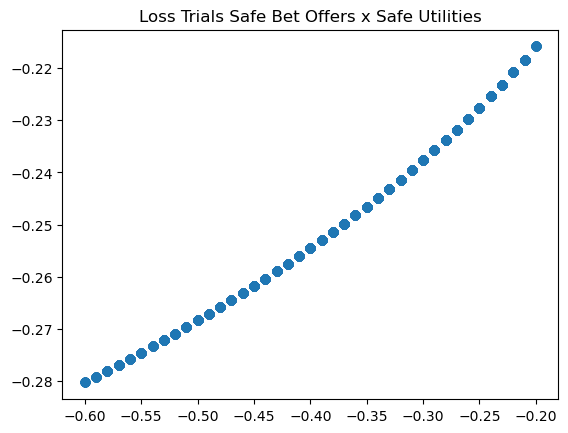

In [40]:
#check safe bets vs utilities for loss, mix, gain trials
plt.scatter(base_pt_loss_df.SafeBet, base_pt_loss_df.util_safe)
plt.title('Loss Trials Safe Bet Offers x Safe Utilities')


Text(0.5, 1.0, 'Mix Trials Safe Bet Offers x  Safe Utilities')

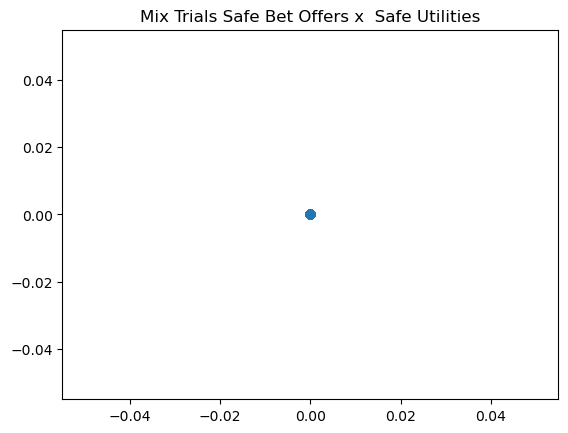

In [41]:
plt.scatter(base_pt_mix_df.SafeBet, base_pt_mix_df.util_safe) #will always one be point at zero 
plt.title('Mix Trials Safe Bet Offers x  Safe Utilities')

Text(0.5, 1.0, 'Gain Trials Safe Bet Offers x Safe Utilities')

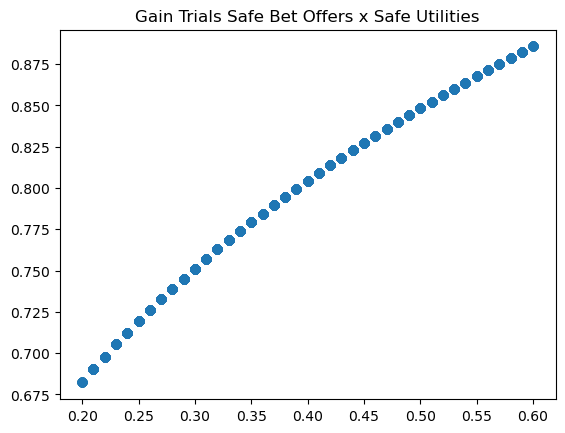

In [42]:
plt.scatter(base_pt_gain_df.SafeBet, base_pt_gain_df.util_safe)
plt.title('Gain Trials Safe Bet Offers x Safe Utilities')

Text(0.5, 1.0, 'Loss Trials Safe Bet Offers x Safe Utilities')

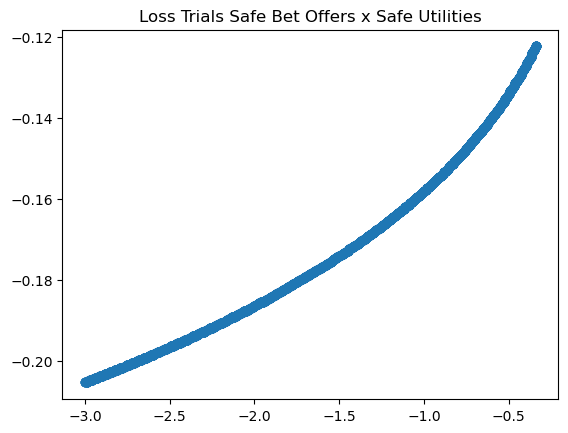

In [43]:
#check gamble bets vs utilities for loss, mix, gain trials
plt.scatter(base_pt_loss_df.LowBet, base_pt_loss_df.util_gamble)
plt.title('Loss Trials Safe Bet Offers x Safe Utilities')


Text(0.5, 1.0, 'Mix Trials Low Bet Offers x Gamble Utilities')

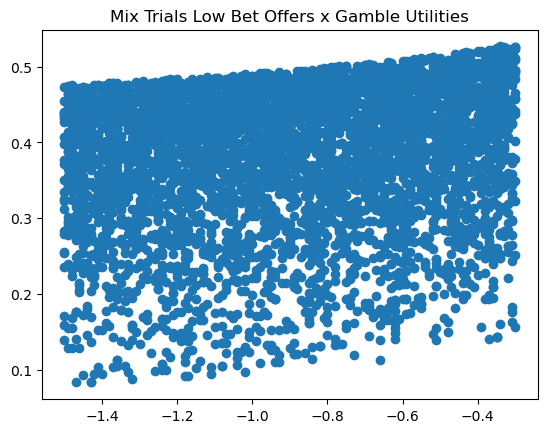

In [44]:
#check gamble low bets vs utilities for mix trials
plt.scatter(base_pt_mix_df.LowBet, base_pt_mix_df.util_gamble)
plt.title('Mix Trials Low Bet Offers x Gamble Utilities')


Text(0.5, 1.0, 'Mix Trials High Bet Offers x Gamble Utilities')

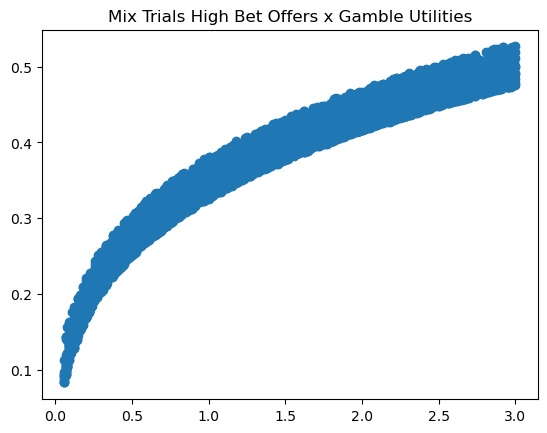

In [45]:
#check gamble high bets vs utilities for mix trials
plt.scatter(base_pt_mix_df.HighBet, base_pt_mix_df.util_gamble)
plt.title('Mix Trials High Bet Offers x Gamble Utilities')

Text(0.5, 1.0, 'Gain Trials High Bet Offers x Gamble Utilities')

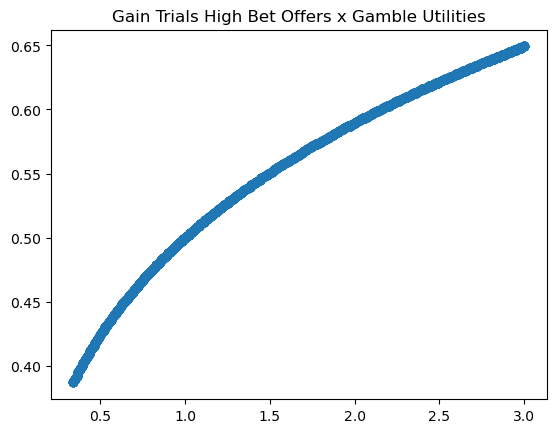

In [46]:
#check gamble high bets vs utilities for gain trials
plt.scatter(base_pt_gain_df.HighBet, base_pt_gain_df.util_gamble)
plt.title('Gain Trials High Bet Offers x Gamble Utilities')

For all trials, do utilities make sense based on offer values? 

Text(0.5, 1.0, 'All Trials Safe Bet Offers x Safe Bet Utilities')

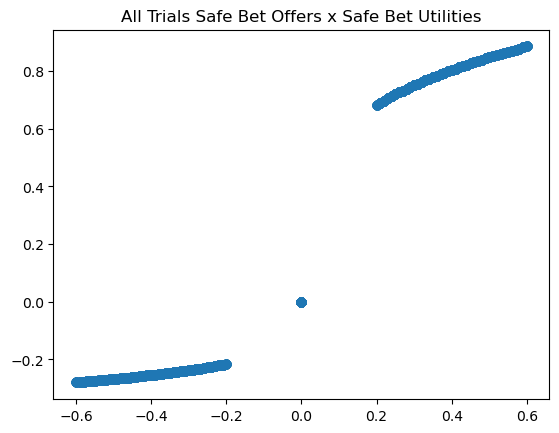

In [47]:
#Do utilities make sense based on offer values? 

plt.scatter(base_pt_sim_df.SafeBet, base_pt_sim_df.util_safe)
plt.title('All Trials Safe Bet Offers x Safe Bet Utilities')



Text(0.5, 1.0, 'All Trials Gamble Expected Value x Gamble Utilities')

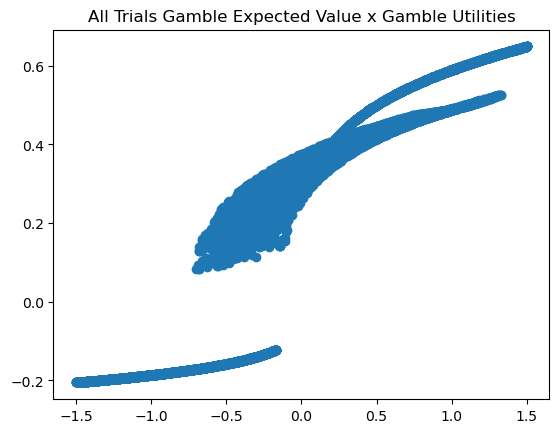

In [48]:
util_gamble_average = (base_pt_sim_df.HighBet+base_pt_sim_df.LowBet)/2

plt.scatter(util_gamble_average, base_pt_sim_df.util_gamble)
plt.title('All Trials Gamble Expected Value x Gamble Utilities')


Do choices make sense based on offers?


In [49]:
base_pt_sim_df

,rep,tr,TrialType,ChoicePred,ChoiceProb,util_gamble,util_safe,p_gamble,p_safe,SafeBet,HighBet,LowBet
0,0,0,gain,safe,[0.5309868040905781],[0.4914529782843273],[0.8749819750900834],[0.4690131959094218],[0.5309868040905781],0.57,0.93,0.00
1,0,1,loss,gamble,[0.5059411652781528],[-0.18404403741743539],[-0.25748807818470854],[0.5059411652781528],[0.49405883472184725],-0.42,0.00,-1.89
2,0,2,loss,gamble,[0.5059370929677648],[-0.19498458357639725],[-0.26837827815017784],[0.5059370929677648],[0.4940629070322352],-0.50,0.00,-2.41
3,0,3,mix,gamble,[0.538770557976514],[0.4802188819810883],[0.0],[0.538770557976514],[0.4612294420234859],0.00,2.91,-1.17
4,0,4,gain,safe,[0.5074848111535772],[0.6268513155821437],[0.7193802964795893],[0.4925151888464227],[0.5074848111535772],0.25,2.59,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,99,145,mix,gamble,[0.5250238577051809],[0.30958630967237155],[0.0],[0.5250238577051809],[0.47497614229481905],0.00,0.63,-0.57
14996,99,146,loss,gamble,[0.5047700583897697],[-0.17079356799365658],[-0.2297595260975773],[0.5047700583897697],[0.4952299416102303],-0.26,0.00,-1.38
14997,99,147,gain,safe,[0.5085954669259496],[0.5915983865465861],[0.697860084036849],[0.4914045330740504],[0.5085954669259496],0.22,2.03,0.00
14998,99,148,gain,safe,[0.5239576129979524],[0.5749358141721946],[0.871310239976022],[0.47604238700204754],[0.5239576129979524],0.56,1.80,0.00


In [56]:
loss,mix,gain = SWB_modeling_utils.simulation_norm_gamble_choices(base_pt_sim_df)


In [78]:
gamble_plot = pd.DataFrame(columns=['loss_x','loss_y','mix_x','mix_y','gain_x','gain_y'])

df={}
df['loss_x'] = loss['loss_x_axis']
df['loss_y'] = loss['loss_choice_props']

df['mix_x'] = mix['mix_x_axis']
df['mix_y'] =  mix['mix_choice_props']

df['gain_x'] = gain['gain_x_axis']
df['gain_y'] = gain['gain_choice_props']

gamble_plot = pd.concat([gamble_plot,pd.DataFrame(df)])

gamble_plot = gamble_plot.dropna(axis=0)

In [79]:
gamble_plot

,loss_x,loss_y,mix_x,mix_y,gain_x,gain_y
0,-5.206579,0.574055,-0.4025,0.378669,0.79298,0.380478
1,-2.832632,0.633947,0.0275,0.407371,1.404425,0.392822
2,-2.064499,0.633572,0.3175,0.448141,2.067418,0.399402
3,-1.402539,0.67042,0.605,0.437378,2.849567,0.428714
4,-0.79333,0.722904,1.0375,0.443359,5.39798,0.412351


In [46]:
gamble_plot.loss_x.astype(float)

0   -5.377056
1   -2.848933
2   -2.093855
3   -1.431175
4   -0.801504
Name: loss_x, dtype: float64

Text(0.5, 1.05, 'Influence of Expected Value on Gamble Decision')

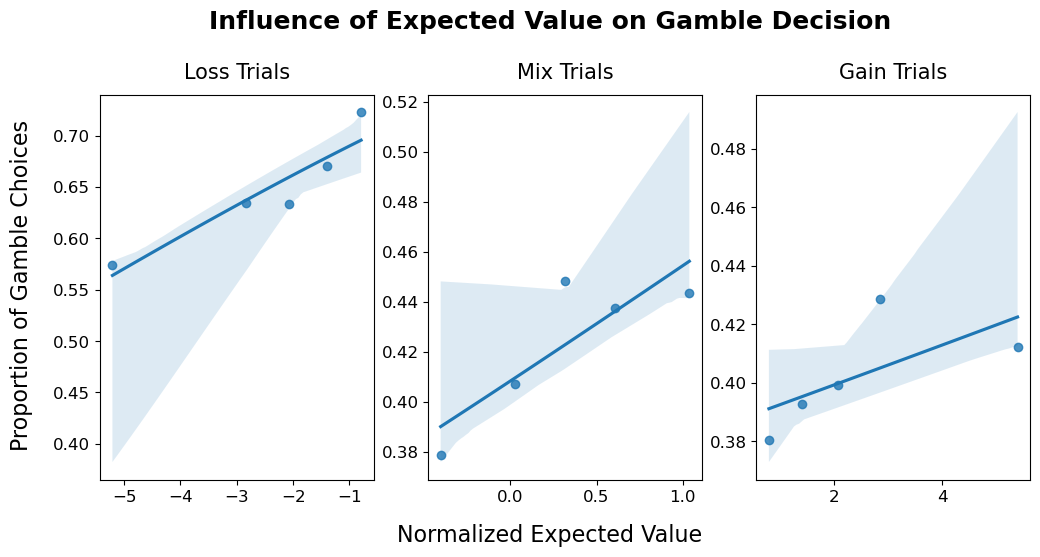

In [93]:
#Do choices make sense based on offers?

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))
# sns.set_theme(style='ticks',font='Arial') #magma_r,gnuplot,paired,cubehelix_r
sns.regplot(ax=ax1,x=gamble_plot.loss_x.astype(float),y=gamble_plot.loss_y.astype(float),logistic=True,scatter=True,fit_reg=True)
sns.regplot(ax=ax2,x=gamble_plot.mix_x.astype(float),y=gamble_plot.mix_y.astype(float),logistic=True,scatter=True)
sns.regplot(ax=ax3,x=gamble_plot.gain_x.astype(float),y=gamble_plot.gain_y.astype(float),logistic=True,scatter=True)

# sns.regplot(data=gamble_plot,ax=ax2,x='mix_x',y='mix_y',ci=95,logistic=True,scatter=False)
# sns.regplot(data=gamble_plot,ax=ax3,x='gain_x',y='gain_y',ci=95,logistic=True,scatter=False)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.tick_params(labelsize=12)
ax1.set_title('Loss Trials',weight='medium',fontsize=15,y=1.02)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.tick_params(labelsize=12)
ax2.set_title('Mix Trials',weight='medium',fontsize=15,y=1.02)
ax3.set_ylabel(None)
ax3.set_xlabel(None)
ax3.tick_params(labelsize=12)
ax3.set_title('Gain Trials',weight='medium',fontsize=15,y=1.02)
fig.supxlabel('Normalized Expected Value',y=-0.025,weight='medium',fontsize=16)
fig.supylabel('Proportion of Gamble Choices',x=0.05,weight='medium',fontsize=16)
fig.suptitle('Influence of Expected Value on Gamble Decision',y=1.05,weight='semibold',fontsize=18)

Do choices make sense based on utilities? 

In [95]:
base_pt_sim_df.columns

Index(['rep', 'tr', 'TrialType', 'ChoicePred', 'ChoiceProb', 'util_gamble',
       'util_safe', 'p_gamble', 'p_safe', 'SafeBet', 'HighBet', 'LowBet'],
      dtype='object')

In [96]:

loss_util,mix_util,gain_util = SWB_modeling_utils.simulation_util_norm_gamble_choices(base_pt_sim_df)


In [97]:
gamble_plot_util = pd.DataFrame(columns=['loss_x','loss_y','mix_x','mix_y','gain_x','gain_y'])

df_util={}
df_util['loss_x'] = loss_util['loss_x_axis']
df_util['loss_y'] = loss_util['loss_choice_props']

df_util['mix_x'] = mix_util['mix_x_axis']
df_util['mix_y'] =  mix_util['mix_choice_props']

df_util['gain_x'] = gain_util['gain_x_axis']
df_util['gain_y'] = gain_util['gain_choice_props']

gamble_plot_util = pd.concat([gamble_plot_util,pd.DataFrame(df_util)])

gamble_plot_util = gamble_plot_util.dropna(axis=0)

Text(0.5, 1.05, 'Influence of Gamble Utility on Decision')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


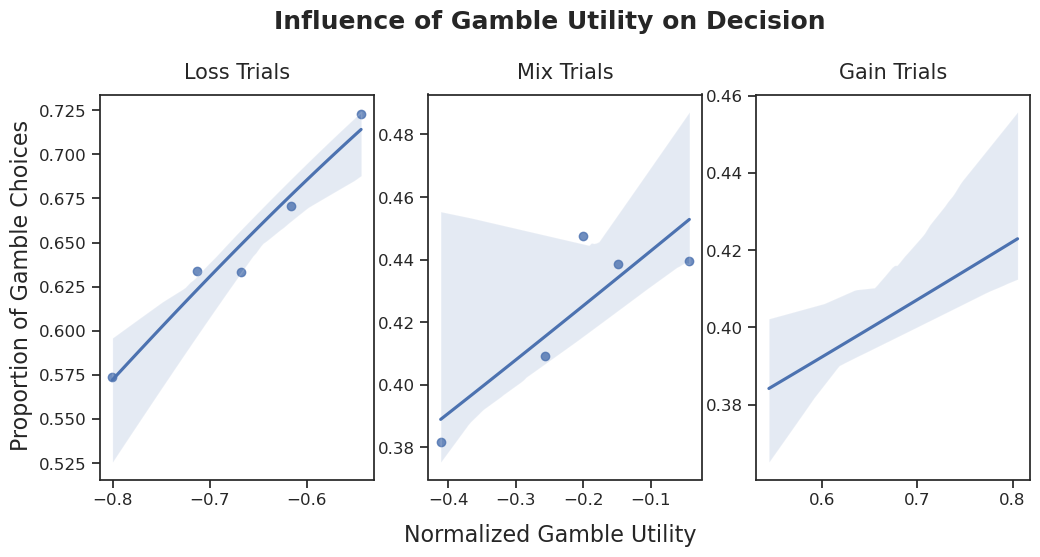

In [99]:
#Do choices make sense based on utilities?

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))
sns.set_theme(style='ticks',font='Arial') #magma_r,gnuplot,paired,cubehelix_r
sns.regplot(ax=ax1,x=gamble_plot_util.loss_x.astype(float),y=gamble_plot_util.loss_y.astype(float),logistic=True,scatter=True,fit_reg=True)
sns.regplot(ax=ax2,x=gamble_plot_util.mix_x.astype(float),y=gamble_plot_util.mix_y.astype(float),logistic=True,scatter=True)
sns.regplot(ax=ax3,x=gamble_plot_util.gain_x.astype(float),y=gamble_plot_util.gain_y.astype(float),ci=95,logistic=True,scatter=False)

# sns.regplot(data=gamble_plot_util,ax=ax1,x='loss_x',y='loss_y',ci=95,logistic=True,scatter=False)
# sns.regplot(data=gamble_plot_util,ax=ax2,x='mix_x',y='mix_y',ci=95,logistic=True,scatter=False)
# sns.regplot(data=gamble_plot_util,ax=ax3,x='gain_x',y='gain_y',ci=95,logistic=True,scatter=False)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.tick_params(labelsize=12)
ax1.set_title('Loss Trials',weight='medium',fontsize=15,y=1.02)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.tick_params(labelsize=12)
ax2.set_title('Mix Trials',weight='medium',fontsize=15,y=1.02)
ax3.set_ylabel(None)
ax3.set_xlabel(None)
ax3.tick_params(labelsize=12)
ax3.set_title('Gain Trials',weight='medium',fontsize=15,y=1.02)
fig.supxlabel('Normalized Gamble Utility',y=-0.025,weight='medium',fontsize=16)
fig.supylabel('Proportion of Gamble Choices',x=0.05,weight='medium',fontsize=16)
fig.suptitle('Influence of Gamble Utility on Decision',y=1.05,weight='semibold',fontsize=18)

## Simulation for Model 2: Dual Risk Aversion PT Model
- free params (4): gain risk aversion, loss risk aversion, loss aversion, temp


In [32]:
#free parameters: loss aversion, risk aversion for gain, risk aversion for loss inverse temperature

number_of_trials = 150
number_of_reps = 100

risk_gain_dual_sim_init = SWB_modeling_utils.param_init(n_values=1, n_iter=1, upper_bound=3, lower_bound=0.1, method='beta', beta_shape=[1,9])
risk_loss_dual_sim_init = SWB_modeling_utils.param_init(n_values=1, n_iter=1, upper_bound=3, lower_bound=0.1, method='beta', beta_shape=[1,9])
loss_dual_sim_init = SWB_modeling_utils.param_init(n_values=1, n_iter=1, upper_bound=5, lower_bound=0.1, method='beta', beta_shape=[2,9])
temp_dual_sim_init = SWB_modeling_utils.param_init(n_values=1, n_iter=1, upper_bound=20, lower_bound=0.1, method='beta', beta_shape=[1,8])


print('Risk gain:',risk_gain_dual_sim_init,'Risk loss:',risk_loss_dual_sim_init,'Loss:',loss_dual_sim_init,'Inv Temp:',temp_dual_sim_init)

Risk gain: [0.18653237] Risk loss: [0.38153358] Loss: [0.60989941] Inv Temp: [5.80565808]


In [33]:
dual_risk_pt_sim_df = SWB_modeling_utils.simulate_dual_risk_pt((risk_gain_dual_sim_init,risk_loss_dual_sim_init,loss_dual_sim_init,temp_dual_sim_init),number_of_reps,number_of_trials)


In [34]:
dual_risk_pt_sim_df

,rep,tr,type,choice_pred,choice_prob,util_gamble,util_safe,p_gamble,p_safe,safe_bet,high_bet,low_bet
0,0,0,mix,gamble,[0.5815094418200905],[0.056664184440243626],[0.0],[0.5815094418200905],[0.41849055817990954],0.00,0.17,-0.98
1,0,1,gain,safe,[0.7857870642113614],[0.5235620188836592],[0.7474324707284747],[0.2142129357886386],[0.7857870642113614],0.21,1.28,0.00
2,0,2,gain,gamble,[0.30081015827208196],[0.6086670586578412],[0.7539465294416482],[0.30081015827208196],[0.699189841727918],0.22,2.87,0.00
3,0,3,mix,gamble,[0.5828114112191349],[0.05758611317782342],[0.0],[0.5828114112191349],[0.4171885887808652],0.00,0.27,-1.27
4,0,4,mix,gamble,[0.8437231124799498],[0.29043994629467995],[0.0],[0.8437231124799498],[0.1562768875200502],0.00,1.34,-0.52
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,99,145,gain,safe,[0.8432963284615758],[0.5089687052368429],[0.7988517486514561],[0.1567036715384243],[0.8432963284615758],0.30,1.10,0.00
14996,99,146,gain,safe,[0.7393416848578626],[0.6090620953918569],[0.7886368737394097],[0.2606583151421373],[0.7393416848578626],0.28,2.88,0.00
14997,99,147,gain,safe,[0.847619269215435],[0.5550146755058524],[0.8505969057057975],[0.15238073078456504],[0.847619269215435],0.42,1.75,0.00
14998,99,148,loss,safe,[0.4383960619394086],[-0.43256930096447044],[-0.475230117134913],[0.5616039380605915],[0.4383960619394086],-0.52,0.00,-2.50


### Simulation Evaluation:

1. Do utilities make sense based on known input parameters?
2. Do choices make sense based on known inverse temperature?
3. Do utilities make sense based on offer values? 
4. Do probabilities make sense based on utilities?
5. Do choices make sense based on probabilities?

In [35]:
summary = dual_risk_pt_sim_df.groupby(by='type').mean()
summary

,rep,tr,safe_bet,high_bet,low_bet
type,,,,,
gain,49.838684,74.619826,0.393638,1.686691,0.000000
loss,48.632124,74.630530,-0.393302,0.000000,-1.687425
mix,50.032412,74.251740,0.000000,1.524790,-0.897351


Split into trial type dfs to test simulation

In [36]:
#split df by trial type 
dual_risk_loss_df = dual_risk_pt_sim_df[dual_risk_pt_sim_df['type']=='loss']
dual_risk_mix_df = dual_risk_pt_sim_df[dual_risk_pt_sim_df['type']=='mix']
dual_risk_gain_df = dual_risk_pt_sim_df[dual_risk_pt_sim_df['type']=='gain']

Text(0.5, 1.0, 'Loss Trials Safe Bet Offers x Safe Utilities')

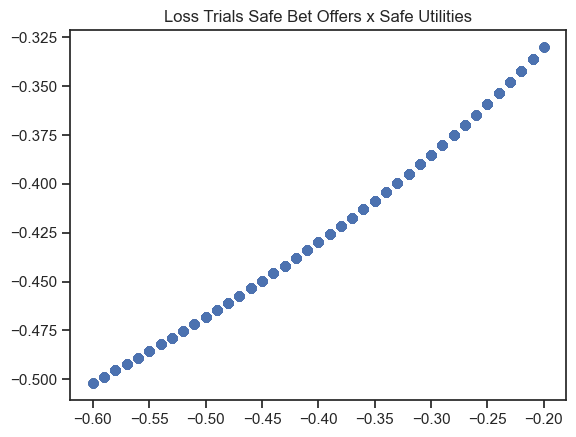

In [37]:
#Do utilities make sense based on offer values? 
plt.scatter(dual_risk_loss_df.safe_bet, dual_risk_loss_df.util_safe)
plt.title('Loss Trials Safe Bet Offers x Safe Utilities')

Text(0.5, 1.0, 'Mix Trials Safe Bet Offers x Safe Utilities')

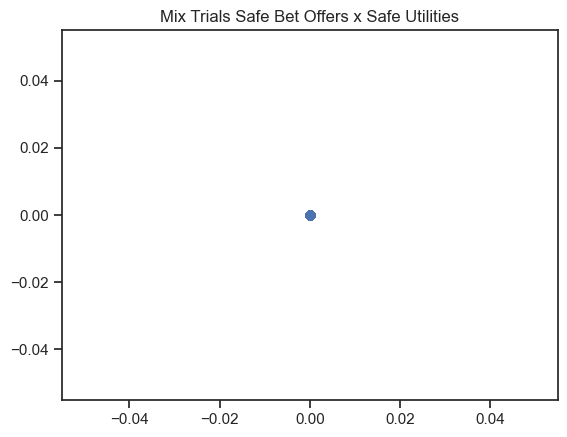

In [38]:
#Mix Trials - Do utilities make sense based on offer values? 
plt.scatter(dual_risk_mix_df.safe_bet, dual_risk_mix_df.util_safe)
plt.title('Mix Trials Safe Bet Offers x Safe Utilities')

Text(0.5, 1.0, 'Gain Trials Safe Bet Offers x Safe Utilities')

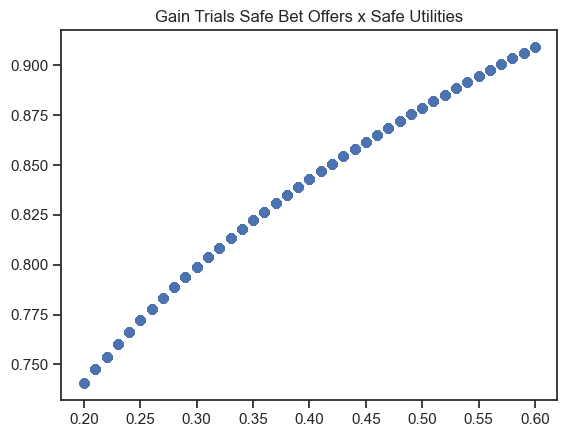

In [39]:
#Gain Trials - Do utilities make sense based on offer values? 
plt.scatter(dual_risk_gain_df.safe_bet, dual_risk_gain_df.util_safe)
plt.title('Gain Trials Safe Bet Offers x Safe Utilities')

Text(0.5, 1.0, 'Loss Trials Low Bet Offers x Gamble Utilities')

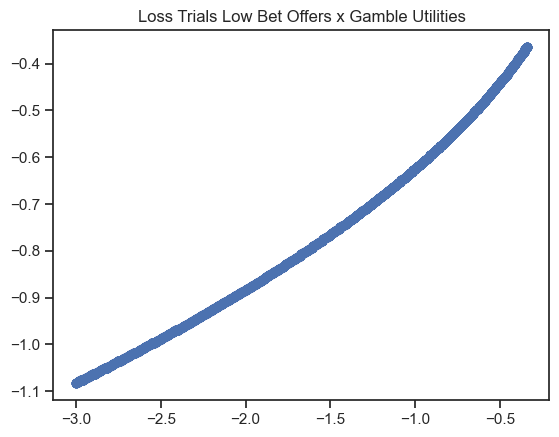

In [82]:
#Loss Trials - Do gamble utilities make sense based on low offer values? 
plt.scatter(dual_risk_loss_df.low_bet, dual_risk_loss_df.util_gamble)
plt.title('Loss Trials Low Bet Offers x Gamble Utilities')

Text(0.5, 1.0, 'Mix Trials Low Bet Offers x Gamble Utilities')

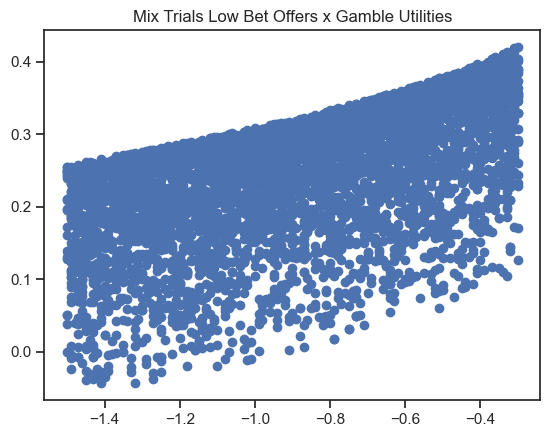

In [40]:
#Mix Trials - Do gamble utilities make sense based on low offer values? 
plt.scatter(dual_risk_mix_df.low_bet, dual_risk_mix_df.util_gamble)
plt.title('Mix Trials Low Bet Offers x Gamble Utilities')

Text(0.5, 1.0, 'Mix Trials High Bet Offers x Gamble Utilities')

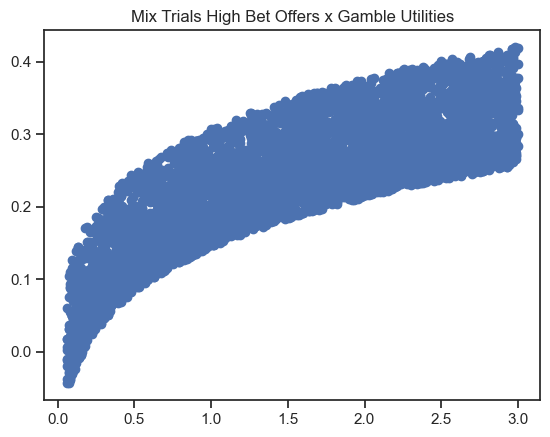

In [42]:
#Mix Trials - Do gamble utilities make sense based on high offer values? 
plt.scatter(dual_risk_mix_df.high_bet, dual_risk_mix_df.util_gamble)
plt.title('Mix Trials High Bet Offers x Gamble Utilities')

Text(0.5, 1.0, 'Gain Trials High Bet Offers x Gamble Utilities')

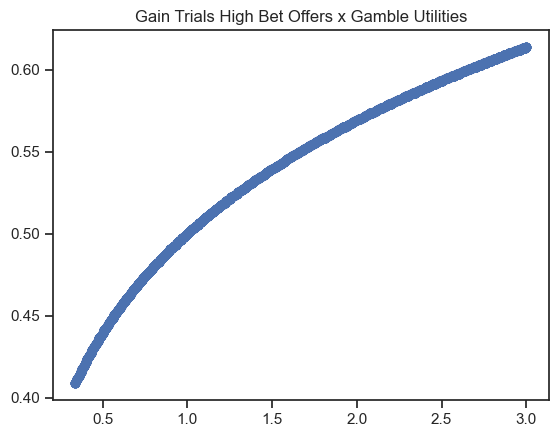

In [43]:
#Gain Trials - Do gamble utilities make sense based on high offer values? 
plt.scatter(dual_risk_gain_df.high_bet, dual_risk_gain_df.util_gamble)
plt.title('Gain Trials High Bet Offers x Gamble Utilities')

Text(0.5, 1.0, 'All Trials Safe Bet Offers x Safe Utilities')

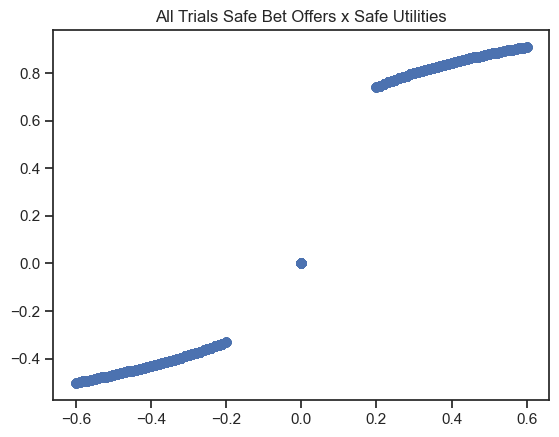

In [44]:
#All trials - utilities make sense based on offer values? 
plt.scatter(dual_risk_pt_sim_df.safe_bet, dual_risk_pt_sim_df.util_safe)
plt.title('All Trials Safe Bet Offers x Safe Utilities')

Text(0.5, 1.0, 'All Trials Gamble Expected Value x Gamble Utilities')

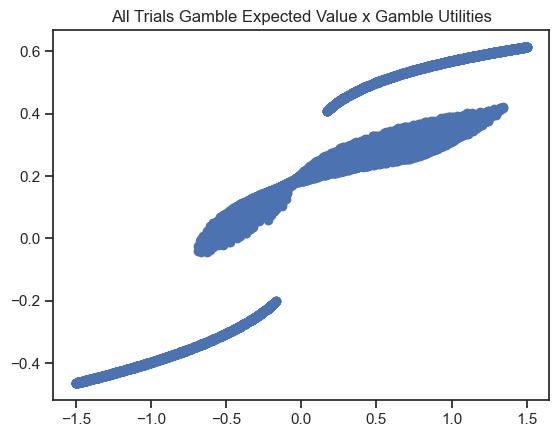

In [45]:
#All trials - Gamble utilities make sense based on offer values? 
dual_util_gamble_average = (dual_risk_pt_sim_df.high_bet+dual_risk_pt_sim_df.low_bet)/2

plt.scatter(dual_util_gamble_average, dual_risk_pt_sim_df.util_gamble)
plt.title('All Trials Gamble Expected Value x Gamble Utilities')

Do choices make sense based on offers?


In [47]:
loss,mix,gain = SWB_modeling_utils.simulation_norm_gamble_choices(dual_risk_pt_sim_df)


In [48]:
gamble_plot = pd.DataFrame(columns=['loss_x','loss_y','mix_x','mix_y','gain_x','gain_y'])

df={}
df['loss_x'] = loss['loss_x_axis']
df['loss_y'] = loss['loss_choice_props']

df['mix_x'] = mix['mix_x_axis']
df['mix_y'] =  mix['mix_choice_props']

df['gain_x'] = gain['gain_x_axis']
df['gain_y'] = gain['gain_choice_props']

gamble_plot = pd.concat([gamble_plot,pd.DataFrame(df)])

gamble_plot = gamble_plot.dropna(axis=0)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 1.05, 'Influence of Expected Value on Gamble Decision')

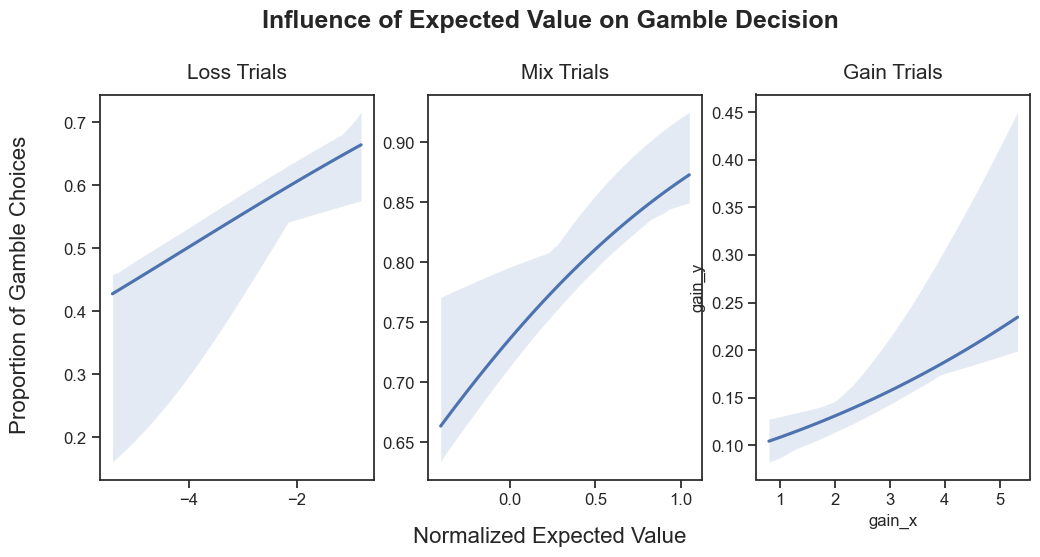

In [49]:
#Do choices make sense based on offers?

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))
sns.set_theme(style='ticks',font='Arial') #magma_r,gnuplot,paired,cubehelix_r
sns.regplot(data=gamble_plot,ax=ax1,x='loss_x',y='loss_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot,ax=ax2,x='mix_x',y='mix_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot,ax=ax3,x='gain_x',y='gain_y',ci=95,logistic=True,scatter=False)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.tick_params(labelsize=12)
ax1.set_title('Loss Trials',weight='medium',fontsize=15,y=1.02)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.tick_params(labelsize=12)
ax2.set_title('Mix Trials',weight='medium',fontsize=15,y=1.02)
ax3.tick_params(labelsize=12)
ax3.set_title('Gain Trials',weight='medium',fontsize=15,y=1.02)
fig.supxlabel('Normalized Expected Value',y=-0.025,weight='medium',fontsize=16)
fig.supylabel('Proportion of Gamble Choices',x=0.05,weight='medium',fontsize=16)
fig.suptitle('Influence of Expected Value on Gamble Decision',y=1.05,weight='semibold',fontsize=18)

Do choices make sense based on utilities? 

In [50]:

loss_util,mix_util,gain_util = SWB_modeling_utils.simulation_util_norm_gamble_choices(dual_risk_pt_sim_df)


In [51]:
gamble_plot_util = pd.DataFrame(columns=['loss_x','loss_y','mix_x','mix_y','gain_x','gain_y'])

df_util={}
df_util['loss_x'] = loss_util['loss_x_axis']
df_util['loss_y'] = loss_util['loss_choice_props']

df_util['mix_x'] = mix_util['mix_x_axis']
df_util['mix_y'] =  mix_util['mix_choice_props']

df_util['gain_x'] = gain_util['gain_x_axis']
df_util['gain_y'] = gain_util['gain_choice_props']

gamble_plot_util = pd.concat([gamble_plot_util,pd.DataFrame(df_util)])

gamble_plot_util = gamble_plot_util.dropna(axis=0)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 1.05, 'Influence of Gamble Utility on Decision')

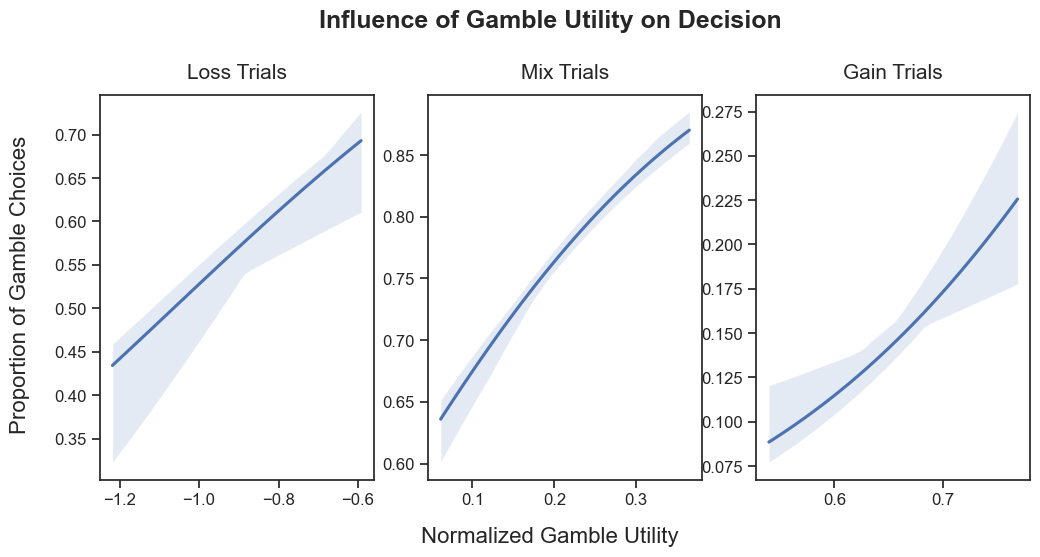

In [52]:
#Do choices make sense based on utilities?

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))
sns.set_theme(style='ticks',font='Arial') #magma_r,gnuplot,paired,cubehelix_r
sns.regplot(data=gamble_plot_util,ax=ax1,x='loss_x',y='loss_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot_util,ax=ax2,x='mix_x',y='mix_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot_util,ax=ax3,x='gain_x',y='gain_y',ci=95,logistic=True,scatter=False)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.tick_params(labelsize=12)
ax1.set_title('Loss Trials',weight='medium',fontsize=15,y=1.02)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.tick_params(labelsize=12)
ax2.set_title('Mix Trials',weight='medium',fontsize=15,y=1.02)
ax3.set_ylabel(None)
ax3.set_xlabel(None)
ax3.tick_params(labelsize=12)
ax3.set_title('Gain Trials',weight='medium',fontsize=15,y=1.02)
fig.supxlabel('Normalized Gamble Utility',y=-0.025,weight='medium',fontsize=16)
fig.supylabel('Proportion of Gamble Choices',x=0.05,weight='medium',fontsize=16)
fig.suptitle('Influence of Gamble Utility on Decision',y=1.05,weight='semibold',fontsize=18)

<font size= 8> **Parameter Recovery** 

For each model:
1. Simulate fake data with known parameters
2. Fit model to fake data to "recover" parameters
3. Compare recovered parameters to known parameters

If the parameters recover, the recovered parameters will have the same distribution as the known parameters

option to bias distribution of parameters - 

# Parameter Recovery for Model 1: Base PT Model
free params: loss aversion, risk aversion, temp
constraints: 
- risk aversion - non negative, risk neutral = 1, risk seeking > 1, risk averse <1 (constrain 0-6 for now, can amend later, rutledge constrained to 0.3-1.3, charpentier btwn 0,3)
- loss aversion - non negative, loss neutral = 1, loss averse > 1, not loss averse <1 (constrain 0-6 for now, can amend later, rutledge constrained to 0.5-5, charpentier btwn 0,5)
- inverse temp - non negative, 0 to inf (degree of stochasticity in choice behavior, constrain 0-10 for now)


### Step 1 - simulation with known parameters

In [100]:
#param recovery step 1 - simulation with known parameters
number_of_trials = 150
number_of_reps = 50

#simulate with beta distribution assumptions based on Charpentier data 

#### set temp lower bound to 0.5 and see if the parameters recover better 
risk_aversion_base = SWB_modeling_utils.param_init(n_values=1, n_iter=number_of_reps, upper_bound=3, lower_bound=0.1, method='beta',beta_shape=[1,9])
loss_aversion_base = SWB_modeling_utils.param_init(n_values=1, n_iter=number_of_reps, upper_bound=4, lower_bound=0.1, method='beta',beta_shape=[2,4])
inverse_temp_base = SWB_modeling_utils.param_init(n_values=1, n_iter=number_of_reps, upper_bound=20, lower_bound=0.1, method='beta',beta_shape=[1,8])

In [101]:
risk_aversion_base

array([1.44983725, 0.2513158 , 0.55556772, 0.14593218, 0.57868193,
       0.82954186, 0.2606772 , 0.15150605, 0.41005312, 0.34272068,
       0.19815864, 0.17754485, 0.33304342, 0.10025171, 0.75945804,
       0.79205343, 0.89379576, 0.34376847, 0.17441285, 0.22553274,
       0.40434452, 0.36142244, 1.0128025 , 0.11505694, 0.26419677,
       0.5656706 , 0.28482106, 0.28255031, 0.21142989, 0.66753178,
       0.88825562, 0.49379251, 0.56406057, 0.7981407 , 0.65612991,
       0.1865295 , 0.65594842, 0.35222219, 0.1619934 , 0.10074009,
       0.23274018, 0.60963309, 0.31976632, 0.12119468, 0.12505657,
       0.84636408, 0.44139451, 0.26786748, 0.22768689, 0.22284603])

In [102]:
loss_aversion_base

array([0.96276482, 0.33361288, 1.78539342, 1.45411389, 1.6003528 ,
       0.64227437, 0.67442923, 1.59113661, 1.39867449, 1.27480377,
       0.30550779, 1.09977456, 0.40542263, 2.58184823, 0.75227391,
       2.57980031, 1.99028476, 3.60574867, 2.39881276, 0.54806356,
       0.85675655, 0.32759712, 0.92398919, 2.08922147, 0.90722757,
       0.67297942, 1.68795324, 0.77642996, 0.93994247, 0.6280574 ,
       0.69371921, 1.6822223 , 2.08565792, 1.79117106, 0.76487359,
       0.84591649, 1.49260795, 0.94599785, 0.63577428, 1.74636782,
       1.55205109, 3.11856421, 1.68557395, 0.91718073, 2.22265016,
       1.52101076, 0.77447853, 2.53523081, 0.41571038, 1.04285868])

In [103]:
inverse_temp_base

array([2.18699984, 1.87631418, 1.9385001 , 3.37380958, 0.99142549,
       2.76634907, 1.90683629, 2.14327494, 0.32546968, 0.13256822,
       6.1211238 , 1.12008739, 4.82015739, 0.85891658, 2.23345812,
       0.26366991, 1.9218443 , 3.13498431, 1.78281832, 4.80330217,
       3.07877511, 0.78343522, 5.36821588, 3.95679816, 1.59642588,
       2.01431936, 1.79451361, 1.09319213, 4.11705395, 1.17055183,
       4.36880401, 0.44258547, 2.57830929, 0.69410227, 1.46517353,
       1.45887602, 1.1428425 , 2.43628766, 1.141822  , 1.11906183,
       2.18229217, 1.01880206, 0.45016635, 0.56666632, 0.44274612,
       0.24897188, 1.88630294, 4.80427311, 0.68963703, 0.33388482])

In [104]:
df_base_pt = {}

for r in range(number_of_reps):
    risk = risk_aversion_base[r]
    loss = loss_aversion_base[r]
    temp = inverse_temp_base[r]

    base_prospect_sim = SWB_modeling_utils.simulate_base_pt((risk,loss,temp),1,number_of_trials)
    df_base_pt[r] = base_prospect_sim



In [105]:
df_base_pt

{0:      rep   tr TrialType ChoicePred  ChoiceProb  util_gamble  util_safe  \
 0      0    0      gain     gamble    0.951399     1.486291   0.126301   
 1      0    1       mix     gamble    0.872995     0.881439   0.000000   
 2      0    2       mix     gamble    0.403888    -0.178002   0.000000   
 3      0    3      loss       safe    0.939877    -1.651175  -0.394035   
 4      0    4       mix     gamble    0.823499     0.704269   0.000000   
 ..   ...  ...       ...        ...         ...          ...        ...   
 145    0  145      loss       safe    0.976392    -2.064691  -0.362698   
 146    0  146      gain     gamble    0.439184     0.172513   0.284297   
 147    0  147      loss       safe    0.957356    -1.764890  -0.342259   
 148    0  148       mix     gamble    0.485733    -0.026100   0.000000   
 149    0  149       mix     gamble    0.850473     0.794841   0.000000   
 
      p_gamble    p_safe  SafeBet  HighBet  LowBet  
 0    0.951399  0.048601     0.24     2.12

In [106]:
import pickle 

save_path = '/sc/arion/projects/guLab/Alie/SWB/swb_behav_models/data/pt_recovery/'
date = '01032024'
# create a binary pickle file 
f = open(f'{save_path}/df_base_pt_{date}.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(df_base_pt,f)
# # close file
f.close()

### Step 2 - estimate params with simulated dataset 

In [108]:
df_base_pt

{0:      rep   tr TrialType ChoicePred  ChoiceProb  util_gamble  util_safe  \
 0      0    0      gain     gamble    0.951399     1.486291   0.126301   
 1      0    1       mix     gamble    0.872995     0.881439   0.000000   
 2      0    2       mix     gamble    0.403888    -0.178002   0.000000   
 3      0    3      loss       safe    0.939877    -1.651175  -0.394035   
 4      0    4       mix     gamble    0.823499     0.704269   0.000000   
 ..   ...  ...       ...        ...         ...          ...        ...   
 145    0  145      loss       safe    0.976392    -2.064691  -0.362698   
 146    0  146      gain     gamble    0.439184     0.172513   0.284297   
 147    0  147      loss       safe    0.957356    -1.764890  -0.342259   
 148    0  148       mix     gamble    0.485733    -0.026100   0.000000   
 149    0  149       mix     gamble    0.850473     0.794841   0.000000   
 
      p_gamble    p_safe  SafeBet  HighBet  LowBet  
 0    0.951399  0.048601     0.24     2.12

In [109]:
#param recovery step 2 - estimate params with simulated dataset 
base_pt_recovery_dict = {}
risk_estimations_base = []
loss_estimations_base = []
temp_estimations_base = []
bounds=(0.01,4),(0.01,6),(0.01,20)
for r in range(number_of_reps):
    df = df_base_pt[r]
    #free parameters: risk aversion, loss aversion, inverse temperature
    risk_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=3, lower_bound=0.1, method='beta',beta_shape=[1,9])
    loss_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=4, lower_bound=0.1, method='beta',beta_shape=[2,4])
    temp_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=20, lower_bound=0.1, method='beta',beta_shape=[1,8])
    risk_est, loss_est, temp_est, bic_est, optim_inits = SWB_modeling_utils.run_base_pt(df,risk_inits,loss_inits,temp_inits,bounds=bounds)
    risk_estimations_base.append(risk_est)
    loss_estimations_base.append(loss_est)
    temp_estimations_base.append(temp_est)
    base_pt_recovery_dict[r] = {'risk_estimation':risk_est,
                                'loss_estimation':loss_est,
                                'temp_estimation':temp_est,
                                'bic_estimation':bic_est,
                                'optim_inits':optim_inits,

    }

    

In [110]:
import pickle 
save_path = '/sc/arion/projects/guLab/Alie/SWB/swb_behav_models/data/pt_recovery/'
date = '01032024'

# create a binary pickle file 
f = open(f'{save_path}/base_pt_recovery_dict_{date}.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(base_pt_recovery_dict,f)
# # close file
f.close()

# create a binary pickle file 
f = open(f'{save_path}/risk_estimations_base_{date}.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(risk_estimations_base,f)
# # close file
f.close()

f = open(f'{save_path}/risk_aversion_base_06192023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(risk_aversion_base,f)
# # close file
f.close()

f = open(f'{save_path}/loss_estimations_base_06192023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(loss_estimations_base,f)
# # close file
f.close()

f = open(f'{save_path}/loss_aversion_base_06192023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(loss_aversion_base,f)
# # close file
f.close()

f = open(f'{save_path}/temp_estimations_base_06192023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(temp_estimations_base,f)
# # close file
f.close()

f = open(f'{save_path}/temp_estimations_base_06192023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(inverse_temp_base,f)
# # close file
f.close()


In [102]:
base_pt_recovery_dict

{0: {'risk_estimation': 0.42253893961431277,
  'loss_estimation': 1.327287705110883,
  'temp_estimation': 20.0,
  'bic_estimation': 67.95225588543188,
  'optim_inits': (0.15355706222170235, 3.133588565380467, 1.97822944422709)},
 1: {'risk_estimation': 0.1,
  'loss_estimation': 4.0,
  'temp_estimation': 20.0,
  'bic_estimation': 15.082367552095272,
  'optim_inits': (0.6302766770426376, 1.8163369589348273, 5.223276580519078)},
 2: {'risk_estimation': 0.6905245441327074,
  'loss_estimation': 0.6730303632725121,
  'temp_estimation': 20.0,
  'bic_estimation': 43.907217597003786,
  'optim_inits': (0.22803746339861067, 1.2484423378237104, 5.432663556098448)},
 3: {'risk_estimation': 0.2273732187653569,
  'loss_estimation': 1.4552489029380031,
  'temp_estimation': 20.0,
  'bic_estimation': 32.50570110218153,
  'optim_inits': (0.2240660290944128, 3.147219283757532, 0.5494462649866313)},
 4: {'risk_estimation': 0.7930060582747467,
  'loss_estimation': 0.7343849726014099,
  'temp_estimation': 20

### Step 3 - Compare known and estimated parameters

In [117]:
risk_estimations_base

[4.0,
 0.048057899174316396,
 0.49112548435660924,
 0.13347129200336247,
 0.8045427321234545,
 0.5793243646813826,
 0.19634463706188307,
 0.17225841863277291,
 0.6141424938166561,
 0.6293950241595636,
 0.20037630584680974,
 0.4513837536328563,
 0.40978269781183446,
 0.17748677708543015,
 0.752584312286326,
 0.6929554875010474,
 0.8109059897510033,
 0.3684506966097428,
 0.1202539180094017,
 0.12701204232503982,
 0.20117966412321733,
 1.595842726707005,
 1.0428820797772362,
 0.12483015476735318,
 0.01,
 0.5656321929915241,
 0.19137750885154783,
 0.01,
 0.20549973809978855,
 0.5726834768547956,
 1.0115298850003778,
 2.6867067134492926,
 0.5447332238331388,
 2.184778128299735,
 1.4411645129705863,
 0.2562527380858075,
 0.536439553272648,
 0.3961304530254075,
 0.2666953425002425,
 0.01,
 0.24039283799870795,
 0.6097686604101982,
 0.7953985277137345,
 0.01,
 0.01,
 4.0,
 0.1795542947171715,
 0.2849957037283445,
 0.01,
 0.01]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


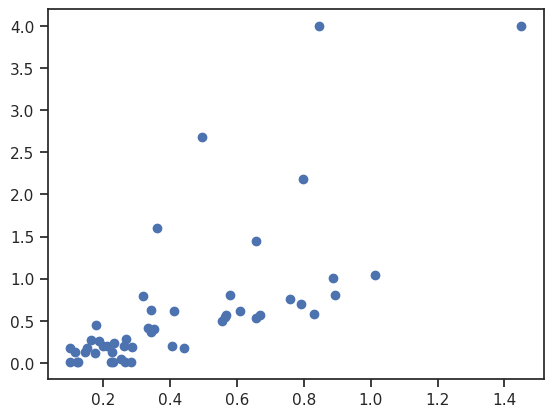

In [111]:
#plot estimated risk aversion parameters with known risk aversion parameters

plt.scatter(risk_aversion_base, risk_estimations_base)

In [112]:
from scipy.stats import pearsonr
risk_base = risk_aversion_base.reshape(50)
corr, _ = pearsonr(risk_base, risk_estimations_base)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.704


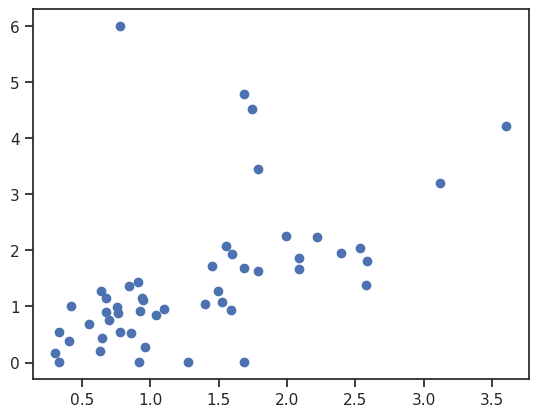

In [113]:
#plot estimated loss aversion parameters with known loss aversion parameters
plt.scatter(loss_aversion_base, loss_estimations_base)


#### keep inverse temp above 0.5 

In [114]:
from scipy.stats import pearsonr
loss_base = loss_aversion_base.reshape(50)
corr, _ = pearsonr(loss_base, loss_estimations_base)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.524


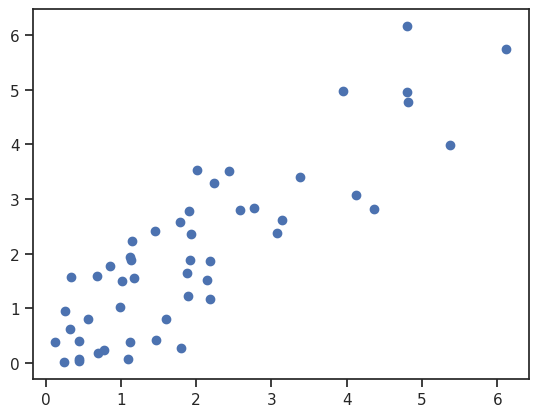

In [115]:
#plot estimated inverse temp parameters with known inverse temp parameters

plt.scatter(inverse_temp_base, temp_estimations_base)


In [116]:
from scipy.stats import pearsonr
temp_base = inverse_temp_base.reshape(50)
corr, _ = pearsonr(temp_base, temp_estimations_base)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.862


# Parameter Recovery for Model 2: Dual Risk PT Model
free params: loss aversion, gain risk aversion, loss risk aversion, temp
constraints: 
- loss aversion - non negative, loss neutral = 1, loss averse > 1, not loss averse <1 (constrain 0-20 for now, can amend later, rutledge constrained to 0.5-5)
- gain risk aversion - non negative, risk neutral = 1, risk seeking > 1, risk averse <1 (constrain 0-20 for now, can amend later, rutledge constrained to 0.3-1.3)
- loss risk aversion - non negative, risk neutral = 1, risk averse > 1, risk seeking < 1 (constrain 0-20 for now, can amend later, rutledge constrained to 0.3-1.3) *opposite curvature for loss risk aversion!
- inverse temp - non negative, 0 to inf (degree of stochasticity in choice behavior)


### Step 1 - simulation with known parameters

In [113]:
#param recovery step 1 - simulation with known parameters
number_of_trials = 150
number_of_reps = 50

risk_gain_aversion_dual = SWB_modeling_utils.param_init(n_values=1, n_iter=number_of_reps, upper_bound=3, lower_bound=0.1, method='beta',beta_shape=[1,9])
risk_loss_aversion_dual = SWB_modeling_utils.param_init(n_values=1, n_iter=number_of_reps, upper_bound=3, lower_bound=0.1, method='beta',beta_shape=[1,9])
loss_aversion_dual = SWB_modeling_utils.param_init(n_values=1, n_iter=number_of_reps, upper_bound=4, lower_bound=0.1, method='beta',beta_shape=[2,4])
inverse_temp_dual = SWB_modeling_utils.param_init(n_values=1, n_iter=number_of_reps, upper_bound=20, lower_bound=0.1, method='beta',beta_shape=[1,8])



In [114]:
df_dual_risk_pt = {}

for r in range(number_of_reps):
    risk_gain = risk_gain_aversion_dual[r]
    risk_loss = risk_loss_aversion_dual[r]
    loss = loss_aversion_dual[r]
    temp = inverse_temp_dual[r]

    dual_risk_sim = SWB_modeling_utils.simulate_dual_risk_pt((risk_gain,risk_loss,loss,temp),1,number_of_trials)
    df_dual_risk_pt[r] = dual_risk_sim



In [115]:
import pickle 
save_path = '/Users/alexandrafink/Documents/GraduateSchool/SaezLab/SWB/swb_computational_modeling/swb_behav_models/data/pt_recovery/'

# create a binary pickle file 
f = open(f'{save_path}/df_dual_risk_pt_06192023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(df_dual_risk_pt,f)
# # close file
f.close()

### Step 2 - Estimate params with simulated dataset

In [119]:
#param recovery step 2 - estimate params with simulated dataset 
dual_pt_recovery_dict = {}
risk_gain_estimations_dual = []
risk_loss_estimations_dual = []
loss_estimations_dual = []
temp_estimations_dual = []
bounds=(0.1,3),(0.1,3),(0.1,4),(0.1,20)
for r in range(number_of_reps):
    df = df_dual_risk_pt[r]
    #free parameters: risk aversion, loss aversion, inverse temperature
    risk_gain_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=3, lower_bound=0.1, method='beta',beta_shape=[1,9])
    risk_loss_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=3, lower_bound=0.1, method='beta',beta_shape=[1,9])
    loss_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=4, lower_bound=0.1, method='beta',beta_shape=[2,4])
    temp_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=20, lower_bound=0.1, method='beta',beta_shape=[1,8])
    risk_gain_est, risk_loss_est, loss_est, temp_est, bic_est, optim_inits = SWB_modeling_utils.run_dual_risk_pt(df,risk_gain_inits,risk_loss_inits,loss_inits,temp_inits,bounds)
    risk_gain_estimations_dual.append(risk_gain_est)
    risk_loss_estimations_dual.append(risk_loss_est)
    loss_estimations_dual.append(loss_est)
    temp_estimations_dual.append(temp_est)
    dual_pt_recovery_dict[r] = {'risk_gain_estimation':risk_gain_est,
                                'risk_loss_estimation':risk_loss_est,
                                'loss_estimation':loss_est,
                                'temp_estimation':temp_est,
                                'bic_estimation':bic_est,
                                'optim_inits':optim_inits,

    }

    

In [120]:
import pickle 
save_path = '/Users/alexandrafink/Documents/GraduateSchool/SaezLab/SWB/swb_computational_modeling/swb_behav_models/data/pt_recovery/'

# create a binary pickle file 
f = open(f'{save_path}/dual_pt_recovery_dict_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(dual_pt_recovery_dict,f)
# # close file
f.close()

# create a binary pickle file 
f = open(f'{save_path}/risk_gain_estimations_dual_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(risk_gain_estimations_dual,f)
# # close file
f.close()

f = open(f'{save_path}/risk_gain_aversion_dual_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(risk_gain_aversion_dual,f)
# # close file
f.close()

# create a binary pickle file 
f = open(f'{save_path}/risk_loss_estimations_dual_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(risk_loss_estimations_dual,f)
# # close file
f.close()

f = open(f'{save_path}/risk_loss_aversion_dual_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(risk_loss_aversion_dual,f)
# # close file
f.close()

f = open(f'{save_path}/loss_estimations_dual_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(loss_estimations_dual,f)
# # close file
f.close()

f = open(f'{save_path}/loss_aversion_dual_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(loss_aversion_dual,f)
# # close file
f.close()

f = open(f'{save_path}/temp_estimations_dual_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(temp_estimations_dual,f)
# # close file
f.close()

f = open(f'{save_path}/temp_estimations_dual_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(inverse_temp_dual,f)
# # close file
f.close()

### Step 3 - Compare known vs estimated parameters

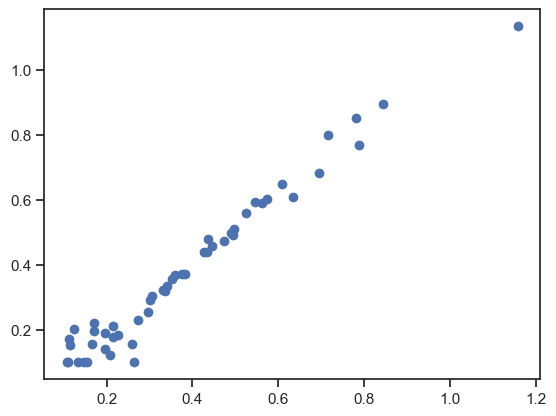

In [121]:
#plot estimated risk gain aversion parameters with known risk aversion parameters

plt.scatter(risk_gain_aversion_dual, risk_gain_estimations_dual)

In [123]:
from scipy.stats import pearsonr
risk_gain_dual = risk_gain_aversion_dual.reshape(50)
corr, _ = pearsonr(risk_gain_dual, risk_gain_estimations_dual)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.984


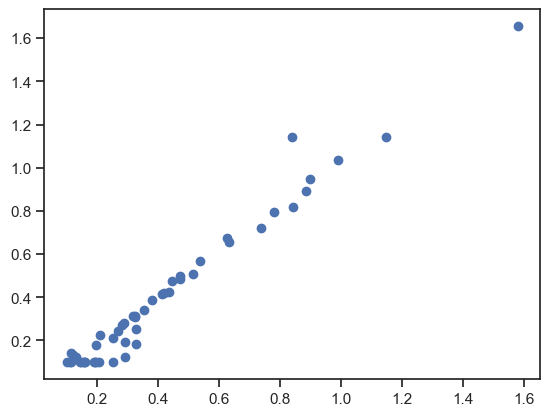

In [124]:
#plot estimated risk loss aversion parameters with known risk aversion parameters

plt.scatter(risk_loss_aversion_dual, risk_loss_estimations_dual)

In [125]:

risk_loss_dual = risk_loss_aversion_dual.reshape(50)
corr, _ = pearsonr(risk_loss_dual, risk_loss_estimations_dual)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.985


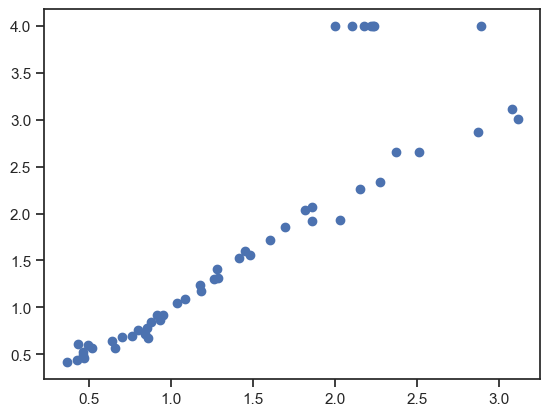

In [126]:
#plot estimated loss aversion parameters with known loss aversion parameters

plt.scatter(loss_aversion_dual, loss_estimations_dual)

In [128]:
loss_dual = loss_aversion_dual.reshape(50)
corr, _ = pearsonr(loss_dual, loss_estimations_dual)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.887


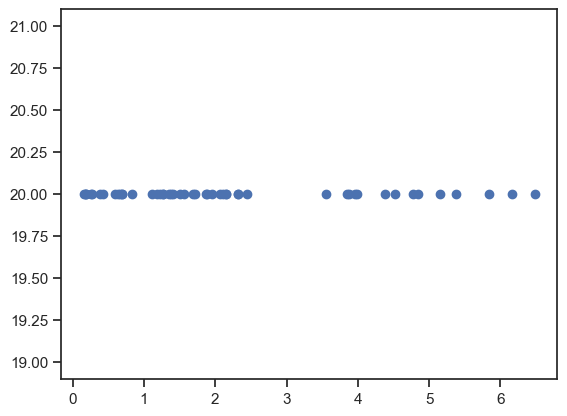

In [129]:
#plot estimated inverse temp parameters with known inverse temp parameters

plt.scatter(inverse_temp_dual, temp_estimations_dual)

In [130]:
temp_dual = inverse_temp_dual.reshape(50)
corr, _ = pearsonr(temp_dual, temp_estimations_dual)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: nan


<font size= 6> **Model Recovery** 

For each model:
1. Simulate mulitple repetitions of model 
2. Fit simulated data back to model and competing models
3. Compute BIC score for each model's fit
4. Compare BIC scores (lower = better model fit)

If the model recovers, it will best fit the data simulated from itself compared to competing models. If a competing model fits the simulated data better, the model is not recoverable.

# Model Recovery for Model 1: Base PT Model

### Step 1- Simulate data from model 1 (already done in parameter recovery)

In [153]:
model1_sim_df = df_base_pt


### Step 2- run models 1 and 2 on base pt simulated df

Model 1 already fit on data in parameter recovery - need to extract BIC values

In [154]:
model1_recovery_dict = base_pt_recovery_dict

In [155]:
#extract BICs from dict
model1_sim_model1_BIC = []

for m in range(len(model1_recovery_dict)):
    bic = model1_recovery_dict[m]['bic_estimation']
    model1_sim_model1_BIC.append(bic)

In [156]:
import pickle 
save_path = '/Users/alexandrafink/Documents/GraduateSchool/SaezLab/SWB/swb_computational_modeling/swb_behav_models/data/pt_recovery/'

# create a binary pickle file 
f = open(f'{save_path}/model1_sim_model1_BIC_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(model1_sim_model1_BIC,f)
# # close file
f.close()


Run model 2 on model 1 simulated df

In [157]:
number_of_reps = 50 
model1_sim_model2_recover_dict = {}
model1_sim_model2_BIC = []
bounds=(0.1,3),(0.1,3),(0.1,4),(0.1,20)


for r in range(number_of_reps):
    df = model1_sim_df[r]
    #free parameters: risk aversion (gain/loss), loss aversion, inverse temperature
    risk_gain_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=3, lower_bound=0.1, method='beta',beta_shape=[1,9])
    risk_loss_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=3, lower_bound=0.1, method='beta',beta_shape=[1,9])
    loss_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=4, lower_bound=0.1, method='beta',beta_shape=[2,4])
    temp_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=20, lower_bound=0.1, method='beta',beta_shape=[1,8])
    risk_gain_est, risk_loss_est, loss_est, temp_est, bic_est, optim_inits = SWB_modeling_utils.run_dual_risk_pt(df,risk_gain_inits,risk_loss_inits,loss_inits,temp_inits,bounds=bounds)
    model1_sim_model2_BIC.append(bic_est)
    model1_sim_model2_recover_dict[r] = {'risk_gain_estimation':risk_gain_est,
                                'risk_loss_estimation':risk_loss_est,
                                'loss_estimation':loss_est,
                                'temp_estimation':temp_est,
                                'bic_estimation':bic_est,
                                'optim_inits':optim_inits,
    }



In [158]:
import pickle 
save_path = '/Users/alexandrafink/Documents/GraduateSchool/SaezLab/SWB/swb_computational_modeling/swb_behav_models/data/pt_recovery/'

# create a binary pickle file 
f = open(f'{save_path}/model1_sim_model2_recover_dict_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(model1_sim_model2_recover_dict,f)
# # close file
f.close()


# create a binary pickle file 
f = open(f'{save_path}/model1_sim_model2_BIC_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(model1_sim_model2_BIC,f)
# # close file
f.close()

### Step 3- Get conf matrix data for model 1 recovery

In [159]:
model1_sim_bic_zip = list(zip(model1_sim_model1_BIC,model1_sim_model2_BIC))
model1_sim_low_bic_idx = [int(np.where(b == min(b))[0]) for b in model1_sim_bic_zip ]



In [160]:
#make confusion matrix 
conf_mat_model1 = np.array([[0,0]])
conf_mat_model1[0,0] = np.count_nonzero(np.array(model1_sim_low_bic_idx)==0)
conf_mat_model1[0,1] = np.count_nonzero(np.array(model1_sim_low_bic_idx)==1)

labels = ['base_pt','dual_risk_pt']

In [161]:
conf_mat_model1

array([[50,  0]])

# Model Recovery for Model 2: Dual Risk PT Model


### Step 1- Simulate data from model 2 (already done in parameter recovery)

In [140]:
model2_sim_df = df_dual_risk_pt

### Step 2- run models 1 and 2 on dual risk pt simulated df

Model 2 already fit on data in parameter recovery - need to extract BIC values

In [141]:
model2_recovery_dict = dual_pt_recovery_dict 

In [142]:
#extract BICs from dict
model2_sim_model2_BIC = []

for m in range(len(model2_recovery_dict)):
    bic = model2_recovery_dict[m]['bic_estimation']
    model2_sim_model2_BIC.append(bic)

In [143]:
import pickle 
save_path = '/Users/alexandrafink/Documents/GraduateSchool/SaezLab/SWB/swb_computational_modeling/swb_behav_models/data/pt_recovery/'

# create a binary pickle file 
f = open(f'{save_path}/model2_sim_model2_BIC_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(model2_sim_model2_BIC,f)
# # close file
f.close()


Run model 1 on model 2 simulated df

In [146]:
number_of_reps = 50 
model2_sim_model1_recover_dict = {}
model2_sim_model1_BIC = []
bounds=(0.1,3),(0.1,4),(0.1,20)


for r in range(number_of_reps):
    df = model2_sim_df[r]
    #free parameters: risk aversion, loss aversion, inverse temperature
    risk_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=3, lower_bound=0.1, method='beta',beta_shape=[1,9])
    loss_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=4, lower_bound=0.1, method='beta',beta_shape=[2,4])
    temp_inits = SWB_modeling_utils.param_init(n_values=1, n_iter=5, upper_bound=20, lower_bound=0.1, method='beta',beta_shape=[1,8])
    risk_est, loss_est, temp_est, bic_est, optim_inits = SWB_modeling_utils.run_base_pt(df,risk_inits,loss_inits,temp_inits,bounds=bounds)
    model2_sim_model1_BIC.append(bic_est)
    model2_sim_model1_recover_dict[r] = {'risk_estimation':risk_est,
                                'loss_estimation':loss_est,
                                'temp_estimation':temp_est,
                                'bic_estimation':bic_est,
                                'optim_inits':optim_inits,

    }



In [148]:
import pickle 
save_path = '/Users/alexandrafink/Documents/GraduateSchool/SaezLab/SWB/swb_computational_modeling/swb_behav_models/data/pt_recovery/'

# create a binary pickle file 
f = open(f'{save_path}/model2_sim_model1_recover_dict_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(model2_sim_model1_recover_dict,f)
# # close file
f.close()


# create a binary pickle file 
f = open(f'{save_path}/model2_sim_model1_BIC_06202023.pkl',"wb")
# # write the python object (dict) to pickle file
pickle.dump(model2_sim_model1_BIC,f)
# # close file
f.close()

### Step 3- Get conf matrix data for model 2 recovery

In [149]:
model2_sim_bic_zip = list(zip(model2_sim_model2_BIC,model2_sim_model1_BIC))

In [150]:
model2_sim_low_bic_idx = [int(np.where(b == min(b))[0]) for b in model2_sim_bic_zip ]



In [151]:
#make confusion matrix 
conf_mat_model2 = np.array([[0,0]])
conf_mat_model2[0,0] = np.count_nonzero(np.array(model2_sim_low_bic_idx)==1)
conf_mat_model2[0,1] = np.count_nonzero(np.array(model2_sim_low_bic_idx)==0)

labels = ['base_pt','dual_risk_pt']

In [152]:
conf_mat_model2  ### shawn says this is actually fine aim for ~75% ish enough evidence to say above chance you're recovering the right model!

array([[11, 39]])